# Problem 1

## A.

Lagrange Interpolation Coefficients are:  [-1.20401563e-04  2.69731250e-04 -2.27789844e-04  6.65924479e-05]
rho(85 degC) ≈ 37.928573 kg/m^3
rho(135 degC) ≈ 29.637202 kg/m^3
rho(163 degC) ≈ 27.169869 kg/m^3


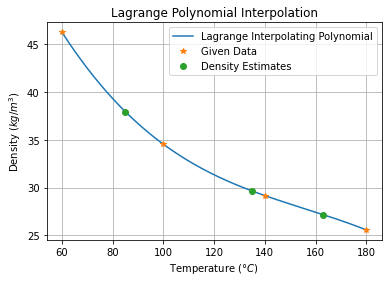

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lagrangeInterpolation(t,y,x,f):
    n = len(t)
    coeff = np.zeros(n)
    coeff = y
    for i in range(n):
        for j in range(n):
            if j==i:
                continue
            coeff[i] = coeff[i]/(t[i]-t[j])
    print('Lagrange Interpolation Coefficients are: ',coeff)
    #return coeff

    def funcLagrange(x):
        sum = 0.0;
        for i in range(n):
            temp = coeff[i]
            for j in range(n):
                if j==i:
                    continue
                temp = temp*(x-t[j])
            sum = sum + temp
        return sum
    
    s = np.zeros(len(x))
    for i in range(len(x)):
        s[i] = funcLagrange(x[i])
    
    temp = []
    density = []
    for i in range(len(f)):
        print("rho(%1.0f degC) ≈ %f kg/m^3"%(f[i],funcLagrange(f[i])))
        temp.append(f[i])
        density.append(funcLagrange(f[i]))
    
    T = np.array([60.0, 100.0, 140.0, 180.0])
    rho = np.array([46.2342, 34.5256, 29.1571, 25.5715])
    
    plt.plot(x,s,'-', label = 'Lagrange Interpolating Polynomial')
    plt.plot(T,rho,'*', label = 'Given Data')
    plt.plot(temp,density,'o', label = 'Density Estimates')
    plt.xlabel(r'Temperature ($\degree C$)')
    plt.ylabel(r'Density ($kg/m^3$)')
    plt.title("Lagrange Polynomial Interpolation")
    plt.legend()
    plt.grid()
    plt.show()

T = np.array([60.0, 100.0, 140.0, 180.0])
rho = np.array([46.2342, 34.5256, 29.1571, 25.5715])
plot_T = np.linspace(60.0,180.0,num=2501)
find_T = np.array([85.0, 135.0, 163.0])

lagrangeInterpolation(T,rho,plot_T,find_T)

In [2]:
# Verification
from scipy.interpolate import lagrange

x = np.array([60.0, 100.0, 140.0, 180.0])
y = np.array([46.2342, 34.5256, 29.1571, 25.5715])
poly = lagrange(x, y)
find_T = np.array([85.0, 135.0, 163.0])
poly(find_T)

array([37.92857305, 29.63720195, 27.16986917])

---
$\pagebreak$

## B.

Newton Interpolation Polynomial Coefficients:  [ 4.62342000e+01 -2.92715000e-01  1.98128125e-03 -1.18677083e-05]
rho(85 degC) ≈ 37.928573 kg/m^3
rho(135 degC) ≈ 29.637202 kg/m^3
rho(163 degC) ≈ 27.169869 kg/m^3


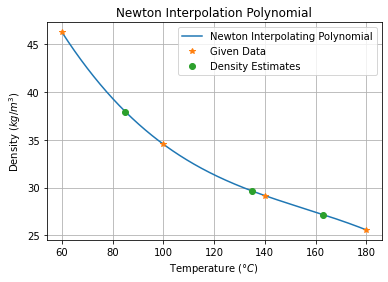

In [3]:
def newtonInterpolation(t,y,x,f):
    n = len(t)
    coeff = np.zeros(n)
    coeff[0] = y[0]
    temp = y
    for i in range(1,n):
        for j in range(n-i):
            temp[j] = (temp[j+1]-temp[j])/(t[j+i]-t[j])
        coeff[i] = temp[0];
    print('Newton Interpolation Polynomial Coefficients: ',coeff)

    def funcNewton(x):
        sum = coeff[0]
        for i in range(1,n):
            temp = coeff[i]*(x-t[i-1])
            for j in range(1,i):
                temp = temp*(x-t[i-j-1])
            sum = sum + temp
        return sum

    s = np.zeros(len(x))
    for i in range(len(x)):
        s[i] = funcNewton(x[i])

    temp = []
    density = []
    for i in range(len(f)):
        print("rho(%1.0f degC) ≈ %f kg/m^3"%(f[i],funcNewton(f[i])))
        temp.append(f[i])
        density.append(funcNewton(f[i]))
        
    T = np.array([60.0, 100.0, 140.0, 180.0])
    rho = np.array([46.2342, 34.5256, 29.1571, 25.5715])
    
    plt.plot(x,s, label = 'Newton Interpolating Polynomial')
    plt.plot(T,rho,'*', label = 'Given Data')
    plt.plot(temp,density,'o', label = 'Density Estimates')
    plt.xlabel(r'Temperature ($\degree C$)')
    plt.ylabel(r'Density ($kg/m^3$)')
    plt.legend()
    plt.title('Newton Interpolation Polynomial')
    plt.grid()
    plt.show()

T = np.array([60.0, 100.0, 140.0, 180.0])
rho = np.array([46.2342, 34.5256, 29.1571, 25.5715])
plot_T = np.linspace(60.0,180.0,num=2501)
find_T = np.array([85.0, 135.0, 163.0])

newtonInterpolation(T,rho,plot_T,find_T)

---
$\pagebreak$

# Problem 2

## A.

In [4]:
from scipy.integrate import quad
from math import sin, cos, exp, pi

# Define the function
def f1(x):
    return (1/x)*sin(x)

# Use the built-in solver
I1, err1 = quad(f1, -pi, pi/2)

# Display Output
from IPython.display import display, Math, Latex
display(Math(r'\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx'))

# Print results
print(f'Analytical Solution is: {I1}')
#print(err1)

<IPython.core.display.Math object>

Analytical Solution is: 3.2226992201369544


In [5]:
# Define function
def f2(x):
    return 8*x**2 - 5*x - 1

# Evaluate using built-in solver
I2, err2 = quad(f2, -1, 5)

# Display output
display(Math(r'\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx'))

print(f'Analytical Solution is: {I2}')
#print(err2)

<IPython.core.display.Math object>

Analytical Solution is: 270.0


In [6]:
# Define function
def f3(x):
    return np.exp(-x**2)

# Evaluate using built-in solver
I3, err3 = quad(f3, 0, 3.5)

# Display output
display(Math(r'\int_{0}^{3.5} e^{-x^{2}} \ dx'))

print(f'Analytical Solution is: {I3}')
#print(err3)

<IPython.core.display.Math object>

Analytical Solution is: 0.8862262668989721


---
$\pagebreak$

## B.

In [7]:
# Midpoint Rule Function
def midpoint(f, a, b):
    result = (b-a)*f((a+b)/2)
    return result

# Display output
display(Math(r'\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx'))

# Evaluate integral
midpoint_solution_f1 = midpoint(f1,-pi, pi/2)
print(f'Midpoint Rule Solution is: {midpoint_solution_f1}')

# Calculate absolute error
error_midpoint_f1 = np.abs(I1-midpoint_solution_f1)
print(f'Absolute Error with respect to solver is: {error_midpoint_f1}')

<IPython.core.display.Math object>

Midpoint Rule Solution is: 4.242640687119285
Absolute Error with respect to solver is: 1.0199414669823303


In [8]:
display(Math(r'\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx'))

midpoint_solution_f2 = midpoint(f2, -1, 5)
print(f'Midpoint Rule Solution is: {midpoint_solution_f2}')

error_midpoint_f2 = np.abs(I2-midpoint_solution_f2)
print(f'Absolute Error with respect to solver is: {error_midpoint_f2}')

<IPython.core.display.Math object>

Midpoint Rule Solution is: 126.0
Absolute Error with respect to solver is: 144.0


In [9]:
display(Math(r'\int_{0}^{3.5} e^{-x^{2}} \ dx'))

midpoint_solution_f3 = midpoint(f3, 0, 3.5)
print(f'Midpoint Rule Solution is: {midpoint_solution_f3}')

error_midpoint_f3 = np.abs(I3-midpoint_solution_f3)
print(f'Absolute Error with respect to solver is: {error_midpoint_f3}')

<IPython.core.display.Math object>

Midpoint Rule Solution is: 0.16369717834385644
Absolute Error with respect to solver is: 0.7225290885551157


---
$\pagebreak$

## C.

In [10]:
# Trapezoidal Rule Function
def trapezoidal(f,a,b):
    result = (b-a)/2 * (f(a) + f(b))
    return result

display(Math(r'\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx'))

trapezoidal_solution_f1 = trapezoidal(f1,-pi, pi/2)
print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f1}')

error_trapezoidal_f1 = np.abs(I1-trapezoidal_solution_f1)
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f1}')

<IPython.core.display.Math object>

Trapezoidal Rule Solution is: 1.5
Absolute Error with respect to solver is: 1.7226992201369544


In [11]:
display(Math(r'\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx'))

trapezoidal_solution_f2 = trapezoidal(f2, -1, 5)

print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f2}')

error_trapezoidal_f2 = np.abs(I2-trapezoidal_solution_f2)
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f2}')

<IPython.core.display.Math object>

Trapezoidal Rule Solution is: 558.0
Absolute Error with respect to solver is: 288.0


In [12]:
display(Math(r'\int_{0}^{3.5} e^{-x^{2}} \ dx'))

trapezoidal_solution_f3 = trapezoidal(f3, 0, 3.5)

print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f3}')

error_trapezoidal_f3 = np.abs(I3-trapezoidal_solution_f3)
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f3}')

<IPython.core.display.Math object>

Trapezoidal Rule Solution is: 1.7500083739554362
Absolute Error with respect to solver is: 0.8637821070564641


---
$\pagebreak$

## D.

In [13]:
# Simpson's Rule Function
def simpson(f,a,b):
    result = ((b-a)/6)*(f(a) + 4*f((a+b)/2) + f(b))
    return result

display(Math(r'\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx'))

simpson_solution_f1 = simpson(f1,-pi, pi/2)
print(f'Simpson Rule Solution is: {simpson_solution_f1}')

error_simpson_f1 = np.abs(I1-simpson_solution_f1)
print(f'Absolute Error with respect to solver is: {error_simpson_f1}')

<IPython.core.display.Math object>

Simpson Rule Solution is: 3.32842712474619
Absolute Error with respect to solver is: 0.10572790460923542


In [14]:
display(Math(r'\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx'))

simpson_solution_f2 = simpson(f2, -1, 5)
print(f'Simpson Rule Solution is: {simpson_solution_f2}')

error_simpson_f2 = np.abs(I2-simpson_solution_f2)
print(f'Absolute Error with respect to solver is: {error_simpson_f2}')

<IPython.core.display.Math object>

Simpson Rule Solution is: 270.0
Absolute Error with respect to solver is: 0.0


In [15]:
display(Math(r'\int_{0}^{3.5} e^{-x^{2}} \ dx'))

simpson_solution_f3 = simpson(f3, 0, 3.5)
print(f'Simpson Rule Solution is: {simpson_solution_f3}')

error_simpson_f3 = np.abs(I3-simpson_solution_f3)
print(f'Absolute Error with respect to solver is: {error_simpson_f3}')

<IPython.core.display.Math object>

Simpson Rule Solution is: 0.6924675768810497
Absolute Error with respect to solver is: 0.19375869001792245


---
### Compiled Results

In [16]:
display(Math(r'\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx'))

print(f'Analytical Solution is: {I1}')
print()
print(f'Midpoint Rule Solution is: {midpoint_solution_f1}')
print(f'Absolute Error with respect to solver is: {error_midpoint_f1}')
print()
print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f1}')
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f1}')
print()
print(f'Simpson Rule Solution is: {simpson_solution_f1}')
print(f'Absolute Error with respect to solver is: {error_simpson_f1}')

<IPython.core.display.Math object>

Analytical Solution is: 3.2226992201369544

Midpoint Rule Solution is: 4.242640687119285
Absolute Error with respect to solver is: 1.0199414669823303

Trapezoidal Rule Solution is: 1.5
Absolute Error with respect to solver is: 1.7226992201369544

Simpson Rule Solution is: 3.32842712474619
Absolute Error with respect to solver is: 0.10572790460923542


In [17]:
display(Math(r'\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx'))

print(f'Analytical Solution is: {I2}')
print()
print(f'Midpoint Rule Solution is: {midpoint_solution_f2}')
print(f'Absolute Error with respect to solver is: {error_midpoint_f2}')
print()
print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f2}')
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f2}')
print()
print(f'Simpson Rule Solution is: {simpson_solution_f2}')
print(f'Absolute Error with respect to solver is: {error_simpson_f2}')

<IPython.core.display.Math object>

Analytical Solution is: 270.0

Midpoint Rule Solution is: 126.0
Absolute Error with respect to solver is: 144.0

Trapezoidal Rule Solution is: 558.0
Absolute Error with respect to solver is: 288.0

Simpson Rule Solution is: 270.0
Absolute Error with respect to solver is: 0.0


In [18]:
display(Math(r'\int_{0}^{3.5} e^{-x^{2}} \ dx'))

print(f'Analytical Solution is: {I3}')
print()
print(f'Midpoint Rule Solution is: {midpoint_solution_f3}')
print(f'Absolute Error with respect to solver is: {error_midpoint_f3}')
print()
print(f'Trapezoidal Rule Solution is: {trapezoidal_solution_f3}')
print(f'Absolute Error with respect to solver is: {error_trapezoidal_f3}')
print()
print(f'Simpson Rule Solution is: {simpson_solution_f3}')
print(f'Absolute Error with respect to solver is: {error_simpson_f3}')

<IPython.core.display.Math object>

Analytical Solution is: 0.8862262668989721

Midpoint Rule Solution is: 0.16369717834385644
Absolute Error with respect to solver is: 0.7225290885551157

Trapezoidal Rule Solution is: 1.7500083739554362
Absolute Error with respect to solver is: 0.8637821070564641

Simpson Rule Solution is: 0.6924675768810497
Absolute Error with respect to solver is: 0.19375869001792245


**Did you expect to find the exact solution?**

* For a quadrature formula to be exact for a degree $n$ polynomial $P_{n}$, or has a degree of precision $n$, this formula must be exact for the functions $1, x, x^{2},..., x^{n}$ and not be exact for $x^{n+1}$.

    * $\int_{-\pi}^{\frac{\pi}{2}} x^{-1} sin\ x\ dx$ has a $sin x$ term and $x^{-1}$ and quadrature formulas are not exact for such polynomials.
    
    * $\int_{0}^{3.5} e^{-x^{2}} \ dx$ has an exponential term and quadrature formulas are not exact for such polynomials.

* Midpoint rule is exact for 1 and x but not for $x^{2}$, it is exact for polynomials up to degree 1 but not for degree 2 and the precision of the formula is 1.
    
    * For the given integrands, an error is observed in all of them as the integrand does not have a positive degree upto 1. 
    
* Trapezoidal rule is exact for 1 and x but not for $x^{2}$, it is exact for polynomials up to degree 1 but not for degree 2 and the precision of the formula is 1.
    
    * For the given integrands, an error is observed in all of them as the integrand does not have a positive degree upto 1.
    
* Simpson's rule is exact for approximating a polynomial of degree upto 3 (cubic polynomial).
    
    * Thus the absolute error is 0 for $\int_{-1}^{5} (8x^{2} - 5x - 1) \ dx$ as its degree is 2.

---
$\pagebreak$

# Problem 3

## A.

In [7]:
import numpy as np
from scipy.integrate import quad
from math import sin, cos, exp, pi
  
def f(x):
#     return (1/x)
    return np.exp(-x**2)

# Define constant before the integral
k = ((3/(pi*pi))**(0.75))
k

0.4093701122225167

In [8]:
# 2 Point Gaussian Quadrature Rule
def gauss_quad_2point(f,a,b):
    result = ((b-a)/2)*(f((a+b)/2) - np.sqrt(1/3)*((b-a)/2) + f((a+b)/2) + np.sqrt(1/3)*((b-a)/2))
    return result

from IPython.display import display, Math, Latex
display(Math(r'f(a) = (\frac{3}{\pi^2})^\frac{3}{4} \int_{0}^{a} e^{-x^{2}} \ dx'))

two_point_gauss_quad = gauss_quad_2point(f,1,2)
solution_A = k*two_point_gauss_quad
print(f'The Two-Point Gaussian Quadrature Estimation for the given function is: {solution_A}')

<IPython.core.display.Math object>

The Two-Point Gaussian Quadrature Estimation for the given function is: 0.04314729238705664


In [9]:
# Verification using built in solver
from scipy import integrate
#f = lambda x: x**8
val,err = integrate.quadrature(f, 0, 1.5)
val*k

0.35049793870041457

In [10]:
# Calculate absolute error 
exact_value = 0.350498
err = np.abs(exact_value - solution_A)
print(f'The Absolute Error is: {err}')

The Absolute Error is: 0.30735070761294336


---
$\pagebreak$

## B.

In [23]:
# 3 Point Gaussian Quadrature Rule
omega1 = 5/9
omega2 = 8/9
omega3 = 5/9
x1 = -np.sqrt(3/5)
x2 = 0
x3 = np.sqrt(3/5)
def gauss_quad_3point(f,a,b):
    result = ((b-a)/2) * (omega1 * f(x1*((b-a)/2)+((b+a)/2)) + 
                          omega2 * f(x2*((b-a)/2)+((b+a)/2)) + 
                          omega3 * f(x3*((b-a)/2)+((b+a)/2)))
    return result
    
three_point_gauss_quad = gauss_quad_3point(f,0,1.5)
solution_B = k*three_point_gauss_quad

display(Math(r'f(a) = (\frac{3}{\pi^2})^\frac{3}{4} \int_{0}^{a} e^{-x^{2}} \ dx'))
print(f'The Three-Point Gaussian Quadrature Estimation for the given function is: {solution_B}')

<IPython.core.display.Math object>

The Three-Point Gaussian Quadrature Estimation for the given function is: 0.3502791325142659


In [24]:
# Calculate absolute error
err = np.abs(exact_value - solution_B)
print(f'The Absolute Error is: {err}')

The Absolute Error is: 0.00021886748573407555


---
$\pagebreak$

# Problem 4

## A.

In [25]:
import numpy as np
v_comp = np.array([0.15, 0.125, 0.1, 0.075, 0.05])
p_comp = np.array([974.3, 1212.6, 1584.9, 2238.3, 3641.1])

print(v_comp,p_comp)

[0.15  0.125 0.1   0.075 0.05 ] [ 974.3 1212.6 1584.9 2238.3 3641.1]


In [26]:
def newtonInterpolation(t,y):
    n = len(t)
    #print(f'n: {n}')
    coeff = np.zeros(n)
    #print('coeff',coeff)
    coeff[0] = y[0]
    temp = y
    #print(temp)
    for i in range(1,n):
        for j in range(n-i):
            temp[j] = (temp[j+1]-temp[j])/(t[j+i]-t[j])
        coeff[i] = temp[0];
        #print(coeff[i])
    print(f"Newton's Interpolations Coefficients are: {coeff}")
    return coeff

coeff = newtonInterpolation(v_comp, p_comp)

Newton's Interpolations Coefficients are: [ 9.74300000e+02 -9.53200000e+03  1.07200000e+05 -1.56906667e+06
  3.42613333e+07]


In [27]:
# Construct the polynomial

def pressure_compression_poly(v):
    return 9.74300000e+02 + -9.53200000e+03 * (v-v_comp[0]) + 1.07200000e+05 * (v-v_comp[0]) * (v-v_comp[1]) + -1.56906667e+06 * (v-v_comp[0]) * (v-v_comp[1]) * (v-v_comp[2]) +  3.42613333e+07 * (v-v_comp[0]) * (v-v_comp[1]) * (v-v_comp[2]) * (v-v_comp[3])

import sympy as sym
v = sym.symbols('v')
pressure_compression_poly(v)

-9532.0*v + (235360.0005 - 1569066.67*v)*(v - 0.125)*(v - 0.1) + (v - 0.125)*(v - 0.1)*(v - 0.075)*(34261333.3*v - 5139199.995) + (v - 0.125)*(107200.0*v - 16080.0) + 2404.1

In [28]:
# Check if the function works
pressure_compression_poly(0.05)

3641.1000009375

In [29]:
# Degree of polynomial

degree = len(coeff) - 1
print(f'The degree of the polynomial is: {degree}')

The degree of the polynomial is: 4


<function matplotlib.pyplot.show(close=None, block=None)>

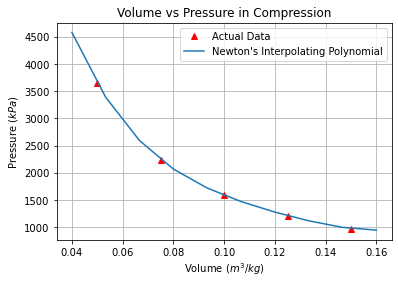

In [30]:
v_comp = np.array([0.15, 0.125, 0.1, 0.075, 0.05])
p_comp = np.array([974.3, 1212.6, 1584.9, 2238.3, 3641.1])

import matplotlib.pyplot as plt
v_temp = np.linspace(0.04,0.16,10)
plt.plot(v_comp,p_comp,'r^', label = 'Actual Data')
plt.plot(v_temp,pressure_compression_poly(v_temp),'-',label="Newton's Interpolating Polynomial")
plt.grid()
plt.title('Volume vs Pressure in Compression')
plt.xlabel(r'Volume ($m^3/kg$)')
plt.ylabel(r'Pressure ($kPa$)')
plt.legend()
plt.show

---

In [31]:
import numpy as np
v_exp = np.array([0.05, 0.075, 0.1, 0.125, 0.15])
p_exp = np.array([6521.6, 3895.3, 2605.8, 1816.2, 1418.2])

print(v_exp,p_exp)

[0.05  0.075 0.1   0.125 0.15 ] [6521.6 3895.3 2605.8 1816.2 1418.2]


In [32]:
coeff = newtonInterpolation(v_exp, p_exp)

Newton's Interpolations Coefficients are: [ 6.52160000e+03 -1.05052000e+05  1.06944000e+06 -8.92693333e+06
  7.77173333e+07]


In [33]:
# Construct the polynomial

def pressure_expansion_poly(v):
    return coeff[0] + coeff[1] * (v-v_exp[0]) + coeff[2] * (v-v_exp[0]) * (v-v_exp[1]) + coeff[3] * (v-v_exp[0]) * (v-v_exp[1]) * (v-v_exp[2]) +  coeff[4] * (v-v_exp[0]) * (v-v_exp[1]) * (v-v_exp[2]) * (v-v_exp[3])

pressure_expansion_poly(v)

-105052.0*v + (446346.666666667 - 8926933.33333335*v)*(v - 0.1)*(v - 0.075) + (v - 0.125)*(v - 0.1)*(v - 0.075)*(77717333.3333336*v - 3885866.66666668) + (v - 0.075)*(1069440.0*v - 53472.0) + 11774.2

In [34]:
# Check if the function works
pressure_expansion_poly(0.15)

1418.1999999999994

In [35]:
# Degree of polynomial

degree = len(coeff) - 1
print(f'The degree of the polynomial is: {degree}')

The degree of the polynomial is: 4


<function matplotlib.pyplot.show(close=None, block=None)>

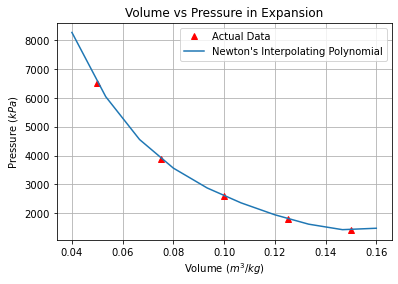

In [36]:
v_exp = np.array([0.05, 0.075, 0.1, 0.125, 0.15])
p_exp = np.array([6521.6, 3895.3, 2605.8, 1816.2, 1418.2])

import matplotlib.pyplot as plt
v_temp = np.linspace(0.04,0.16,10)
plt.plot(v_exp,p_exp,'r^', label = 'Actual Data')
plt.plot(v_temp,pressure_expansion_poly(v_temp),'-',label="Newton's Interpolating Polynomial")
plt.grid()
plt.title('Volume vs Pressure in Expansion')
plt.xlabel(r'Volume ($m^3/kg$)')
plt.ylabel(r'Pressure ($kPa$)')
plt.legend()
plt.show

---
$\pagebreak$

## B.

In [37]:
# Declare function to compute integral using composite trapezoidal rule
def Trapezoidal(x,f):
    I = 0
    for i in range(0,len(x)-1):
        a = x[i]
        b = x[i+1]
        I += (b-a)/2 * ( f(a) + f(b) )
    return I

print(v_comp,p_comp)

[0.15  0.125 0.1   0.075 0.05 ] [ 974.3 1212.6 1584.9 2238.3 3641.1]


In [38]:
#Create points for intervals
xb = np.linspace(v_comp[0],v_comp[-1],201)
W_compression = Trapezoidal (xb, pressure_compression_poly)
print(f'The Work done when gas is compressed from State 1 to 2 is: {W_compression} kJ/kg')

The Work done when gas is compressed from State 1 to 2 is: -179.72978378904327 kJ/kg


In [39]:
from scipy import integrate
Work_In_Compression, Error = integrate.quad(pressure_compression_poly, v_comp[0], v_comp[-1])
print('The Work Done During Compression using Built-in Solver is: ',Work_In_Compression)

The Work Done During Compression using Built-in Solver is:  -179.72822224062494


**NOTE**
* Compression work is positive. 
* But as per the question, integration is done from initial volume (lower limit of integral) to final volume (upper limit of integral) and since the lower limit is larger than the upper limit the answer is negative.

---
$\pagebreak$

## C.

In [40]:
# Print the values to check if the list has changed
print(v_exp,p_exp)

[0.05  0.075 0.1   0.125 0.15 ] [6521.6 3895.3 2605.8 1816.2 1418.2]


In [41]:
#Create points for intervals
xb = np.linspace(v_exp[0],v_exp[-1],201)

W_expansion = Trapezoidal (xb, pressure_expansion_poly)
print(f'The Work done when gas is expanded from State 3 to 4 is: {W_expansion} kJ/kg')

The Work done when gas is expanded from State 3 to 4 is: 299.5766385949197 kJ/kg


In [42]:
Work_In_Expansion, Error = integrate.quad(pressure_expansion_poly, v_exp[0], v_exp[-1])
print('The Work Done During Expansion using Built-in Solver is: ',Work_In_Expansion)

The Work Done During Expansion using Built-in Solver is:  299.57355555555546


---
$\pagebreak$

## D.

In [43]:
# Calculate Net Work
W_net = W_expansion - (-W_compression)
# Here compression work is multiplied by -1 as the answer from Part B already contains a negative sign even though compression work is positive
print(f'The Net Work done by the cycle is: {W_net} kJ/kg')


The Net Work done by the cycle is: 119.84685480587643 kJ/kg


---
$\pagebreak$

# Problem 5

## A.

$f(x,y) = (x^{3} - y^{2})$

(-1.0, 6.0)

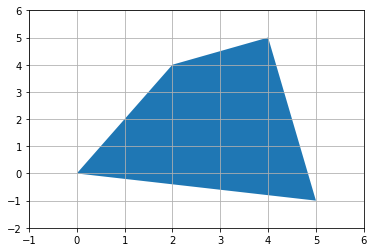

In [44]:
# Mapping the region to standard region

# Plot the quadrilateral

from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

polygon1 = Polygon([(0,0), (5,-1), (4,5), (2,4)])

fig, ax = plt.subplots(1,1)

ax.add_patch(polygon1)
plt.grid()
plt.ylim(-2,6)
plt.xlim(-1,6)

In [45]:
# Function to evaluate "x(u,v)"
def xx(u,v,X):
    x = X[0,0]*N1(u)*N1(v)+X[0,1]*N1(u)*N2(v) \
    + X[1,0]*N2(u)*N1(v) + X[1,1]*N2(u)*N2(v)
    return x

# Function to evaluate "y(u,v)"
def yy(u,v,Y):
    y = Y[0,0]*N1(u)*N1(v)+Y[0,1]*N1(u)*N2(v) \
    + Y[1,0]*N2(u)*N1(v) + Y[1,1]*N2(u)*N2(v)
    return y

# Shape function N1(u), N1(v)
def N1(w):
    return (1-w)/2

# Shape function N2(u), N2(v)
def N2(w):
    return (1+w)/2

# Define function to evaluate Jacobian
def jj(u,v,X,Y):
    dxdu = X[0,0]*(-1/2)*N1(v)+X[0,1]*(-1/2)*N2(v)+\
    X[1,0]*( 1/2)*N1(v)+X[1,1]*( 1/2)*N2(v);
    dxdv = X[0,0]*(-1/2)*N1(u)+X[0,1]*( 1/2)*N1(u)+\
    X[1,0]*(-1/2)*N2(u)+X[1,1]*( 1/2)*N2(u);
    dydu = Y[0,0]*(-1/2)*N1(v)+Y[0,1]*(-1/2)*N2(v)+\
    Y[1,0]*( 1/2)*N1(v)+Y[1,1]*( 1/2)*N2(v);
    dydv = Y[0,0]*(-1/2)*N1(u)+Y[0,1]*( 1/2)*N1(u)+\
    Y[1,0]*(-1/2)*N2(u)+Y[1,1]*( 1/2)*N2(u);
    J = dxdu*dydv - dxdv*dydu
    return J

For u and v -1 -1
We should get X and Y 0.0 0.0


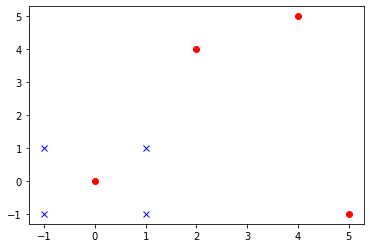

In [46]:
# Mapping

#([[x11, x12], [x21, x22]])
#([[y11, y12], [y21, y22]])

#  the nodes are  listed in the following order (11)(12)(21)(22)
u = np.array([[-1, -1], [1, 1]])
v = np.array([[-1, 1], [-1, 1]])
plt.plot(u,v,'bx')

# the nodes are liste in the following order (11)(12)(21)(22)
X = np.array([[0, 2], [5, 4]])
Y = np.array([[0, 4], [-1, 5]])
plt.plot(X,Y,'ro')

print ("For u and v", u[0,0],v[0,0])
print ("We should get X and Y", xx(u[0,0],v[0,0],X), yy(u[0,0],v[0,0],Y))

In [47]:
#  the nodes are  listed in the following order (11)(12)(21)(22)
u = np.array([[-1, -1], [1, 1]])
v = np.array([[-1, 1], [-1, 1]])

# the nodes are liste in the following order (11)(12)(21)(22)
X = np.array([[0, 2], [5, 4]])
Y = np.array([[0, 4], [-1, 5]])

def f5a(u,v):
    return xx(u/np.sqrt(3), v/np.sqrt(3), X)**3 - yy(u/np.sqrt(3),v/np.sqrt(3),Y)**2

I = f5a(-1,-1)*jj(-1/np.sqrt(3),-1/np.sqrt(3), X, Y) \
    +f5a(1,1)*jj(1/np.sqrt(3),1/np.sqrt(3), X, Y) \
    +f5a(-1,1)*jj(-1/np.sqrt(3),1/np.sqrt(3), X, Y)\
    +f5a(1,-1)*jj(1/np.sqrt(3),-1/np.sqrt(3), X, Y)

print(f'The value of the integral for the given function is : {I}')

The value of the integral for the given function is : 487.9374999999999


---
$\pagebreak$

## B.

$f(x,y) = e^{-0.05x^{2} - y}$

(0.0, 16.0)

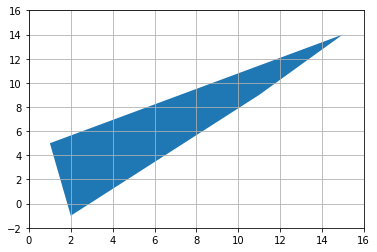

In [48]:
# Plot the quadrilateral

from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

polygon1 = Polygon([(2,-1), (11,9), (15,14), (1,5)])

fig, ax = plt.subplots(1,1)

ax.add_patch(polygon1)
plt.grid()
plt.ylim(-2,16)
plt.xlim(0,16)

For u and v -1 -1
We should get X and Y 2.0 -1.0


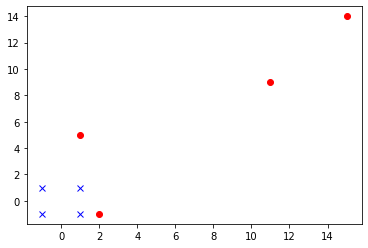

In [49]:
# Mapping

#([[x11, x12], [x21, x22]])
#([[y11, y12], [y21, y22]])

#  the nodes are  listed in the following order (11)(12)(21)(22)
u = np.array([[-1, -1], [1, 1]])
v = np.array([[-1, 1], [-1, 1]])
plt.plot(u,v,'bx')

# the nodes are liste in the following order (11)(12)(21)(22)
X = np.array([[2, 1], [11, 15]])
Y = np.array([[-1, 5], [9, 14]])
plt.plot(X,Y,'ro')

print ("For u and v", u[0,0],v[0,0])
print ("We should get X and Y", xx(u[0,0],v[0,0],X), yy(u[0,0],v[0,0],Y))

In [50]:
#  the nodes are  listed in the following order (11)(12)(21)(22)
u = np.array([[-1, -1], [1, 1]])
v = np.array([[-1, 1], [-1, 1]])

# the nodes are liste in the following order (11)(12)(21)(22)
X = np.array([[2, 1], [11, 15]])
Y = np.array([[-1, 5], [9, 14]])

def f5b(u,v):
    return np.exp(-0.05 * xx(u/np.sqrt(3), v/np.sqrt(3), X)**2 - yy(u/np.sqrt(3),v/np.sqrt(3),Y)) 

I = f5b(-1,-1)*jj(-1/np.sqrt(3),-1/np.sqrt(3), X, Y) \
    +f5b(1,1)*jj(1/np.sqrt(3),1/np.sqrt(3), X, Y) \
    +f5b(-1,1)*jj(-1/np.sqrt(3),1/np.sqrt(3), X, Y)\
    +f5b(1,-1)*jj(1/np.sqrt(3),-1/np.sqrt(3), X, Y)

print(f'The value of the integral for the given function is : {I}')

The value of the integral for the given function is : 0.6769875653086223
